# VIPCCA tutorial
intruduction


## Importing vipcca

In [1]:
import vipcca.vipcca as vip
import vipcca.preprocessing as pp
import vipcca.plotting as pl
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


## Loading data
Download example data at http://141.211.10.196/result/test/papers/vipcca/data.tar.gz

In [2]:
test_result_path = '/Users/zhongyuanke/data/vipcca/'
r1="/Users/zhongyuanke/data/vipcca/293t.h5ad"
r2="/Users/zhongyuanke/data/vipcca/jurkat.h5ad"
r4="/Users/zhongyuanke/data/vipcca/mixed.h5ad"

adata_b1 = pp.read_sc_data(r1, batch_name="293t")
adata_b2 = pp.read_sc_data(r2, batch_name="jurkat")
adata_b3 = pp.read_sc_data(r4, batch_name="mixed")

## Data preprocessing
Filter and standardize each data separately and concatenate multiple data sets into one Anndata object

In [3]:
adata_all = pp.preprocessing([adata_b1, adata_b2, adata_b3], index_unique="-")

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


## Integration

In [4]:
# construct a vipcca object
handle = vip.VIPCCA(
    adata_all=adata_all,
    res_path=test_result_path,
    mode='CVAE',
    split_by="_batch",
    epochs=20,
    lambda_regulizer=5,
    batch_input_size=128,
    batch_input_size2=16
)
# do integration and return an AnnData
adata_integrate = handle.fit_transform()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "vae_mlp"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 2000)         0                                            
__________________________________________________________________________________________________
batch_input1 (InputLayer)       (None, 128)          0                                            
__________________________________________________________________________________________________
encoder_mlp (Model)             [(None, 16), (None,  318368      encoder_input[0][0]              
                                                                 batch_input1[0][0]               
__________________________________________________________________________________________________
batch_input

... storing '_batch' as categorical
... storing 'celltype' as categorical


In [5]:
adata_integrate

AnnData object with n_obs × n_vars = 9530 × 2000
    obs: '_batch', 'celltype', 'n_genes', 'percent_mito', 'n_counts', 'size_factor', 'batch'
    var: 'gene_ids', 'n_cells-0-0', 'highly_variable-0-0', 'means-0-0', 'dispersions-0-0', 'dispersions_norm-0-0', 'n_cells-1-0', 'highly_variable-1-0', 'means-1-0', 'dispersions-1-0', 'dispersions_norm-1-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    obsm: 'X_vipcca'

1.The meta.data of each cell has been saved in adata.obs

2.The embedding representation from vipcca of each cell have been saved in adata.obsm('X_vipcca')

## UMAP Visualization


In [6]:
import matplotlib
matplotlib.use('TkAgg')
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

... storing '_batch' as categorical
... storing 'celltype' as categorical


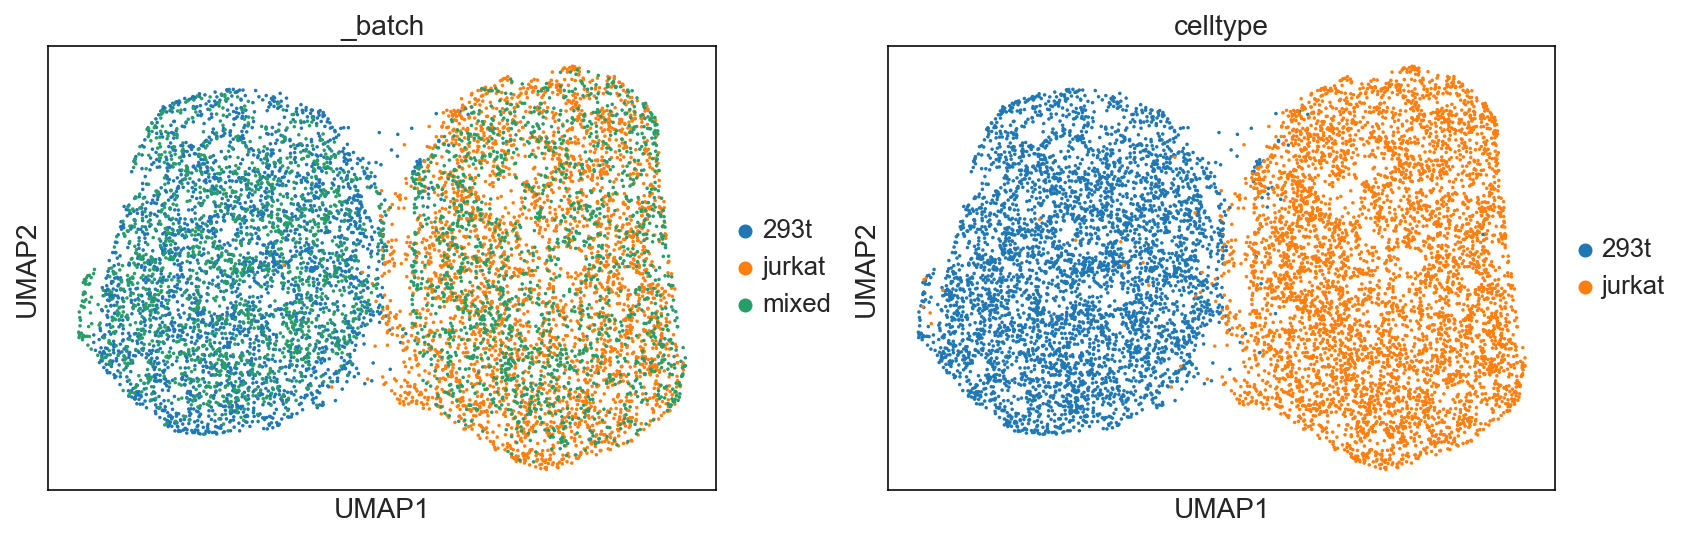

In [7]:
import scanpy as sc
sc.set_figure_params(figsize=[14,6])
%matplotlib inline
sc.pp.neighbors(adata_integrate,use_rep='X_vipcca')
sc.tl.umap(adata_integrate)

sc.pl.umap(adata_integrate, color=['_batch','celltype'],use_raw=False,show=True,)
